In [2]:
import scipy.io as sio
import numpy as np
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
data = sio.loadmat('ex3/ex3data1.mat')

In [5]:
X, Y = data['X'], data['y'].ravel().reshape(-1,1)

In [6]:
Y[Y==10]=0
m = Y.shape[0]

In [9]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

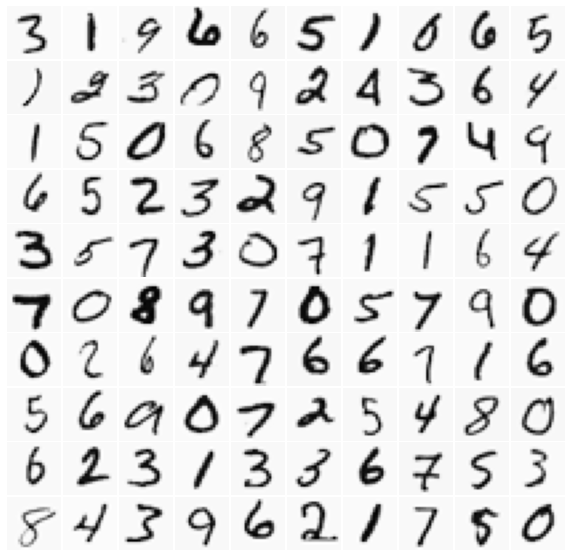

In [10]:

# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]
displayData(sel)

In [71]:
r

In [72]:
std_scale= preprocessing.StandardScaler().fit(X)
standardized_X = std_scale.transform(X)
train_features = np.append(np.ones((X.shape[0], 1)), standardized_X , axis=1)

In [73]:
logistic_regression= LogisticRegression()
weights, cost = logistic_regression.trainOneVsAll(train_features, Y, 0.01, 1, 10)


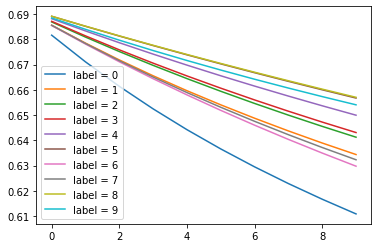

In [74]:
for index, cost_history in enumerate(cost):
    plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = 'label = {}'.format(index))
plt.legend()

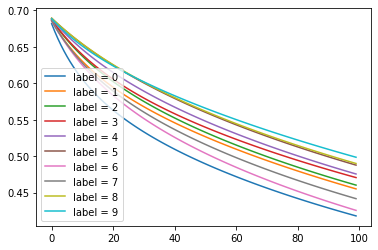

In [76]:
# Choosing learning rate
weights, cost = logistic_regression.trainOneVsAll(train_features, Y, 0.01, 0, 100)
for index, cost_history in enumerate(cost):
    plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = 'label = {}'.format(index))
plt.legend()

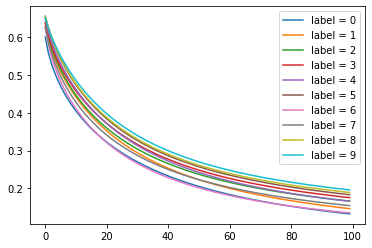

In [77]:
# Choosing learning rate
weights, cost = logistic_regression.trainOneVsAll(train_features, Y, 0.1, 0, 100)
for index, cost_history in enumerate(cost):
    plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = 'label = {}'.format(index))
plt.legend()

<ipython-input-71-45d8702bb9f1>:12: RuntimeWarning: divide by zero encountered in log
  total_cost = -(np.dot(np.log(predictions).transpose(), labels) + np.dot(np.log(1 - predictions).transpose(),


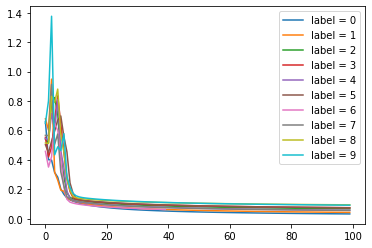

In [78]:
weights, cost = logistic_regression.trainOneVsAll(train_features, Y, 1, 0, 100)
for index, cost_history in enumerate(cost):
    plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = 'label = {}'.format(index))
plt.legend()

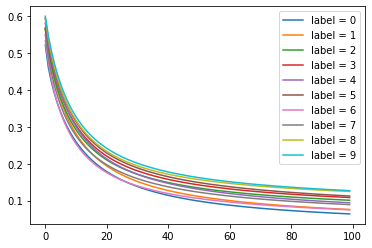

In [79]:
weights, cost = logistic_regression.trainOneVsAll(train_features, Y, 0.3, 0, 100)
for index, cost_history in enumerate(cost):
    plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = 'label = {}'.format(index))
plt.legend()

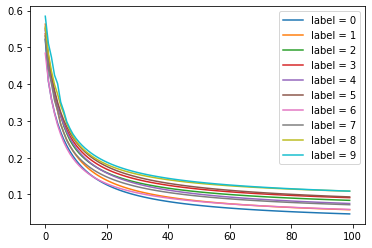

In [80]:
weights, cost = logistic_regression.trainOneVsAll(train_features, Y, 0.5, 0, 100)
for index, cost_history in enumerate(cost):
    plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = 'label = {}'.format(index))
plt.legend()

In [81]:
## Choosen learning rate is 0.5 and lambda = 0
weights, cost = logistic_regression.trainOneVsAll(train_features, Y, 0.5, 0, 1000)
logistic_regression.predictOneVsAll(train_features, weights)
logistic_regression.accuracyOneVsAll(train_features, weights, Y)

<ipython-input-71-45d8702bb9f1>:12: RuntimeWarning: divide by zero encountered in log
  total_cost = -(np.dot(np.log(predictions).transpose(), labels) + np.dot(np.log(1 - predictions).transpose(),


95.16

In [82]:
## Choosen learning rate is 0.5 and lambda = 1
weights, cost = logistic_regression.trainOneVsAll(train_features, Y, 0.5, 1 , 1000)
logistic_regression.predictOneVsAll(train_features, weights)
logistic_regression.accuracyOneVsAll(train_features, weights, Y)

<ipython-input-71-45d8702bb9f1>:12: RuntimeWarning: divide by zero encountered in log
  total_cost = -(np.dot(np.log(predictions).transpose(), labels) + np.dot(np.log(1 - predictions).transpose(),


95.1

In [3]:
weights = sio.loadmat('ex3/ex3weights.mat')

In [7]:
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

In [13]:
X.shape[0]

5000

In [22]:
import numpy as np
import scipy.io as sio


class NeuralNetwork:

    def feed_forward(self, features, list_weights):
        bias_input = np.ones((features.shape[0], 1))
        activation = np.append(bias_input, features, axis=1)
        for weights in list_weights:
            activation = np.append(bias_input, self.sigmoid(np.dot(activation, weights.transpose())), axis=1)
        return activation[:,1:]

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, features, list_weights):
        return np.argmax(self.feed_forward(features, list_weights), axis=1)

    def accuracy(self, features, list_weights, labels):
        predictions = self.predict(features, list_weights)+1
        correct = 0
        for i in range(len(labels)):
            if labels[i] == predictions[i]:
                correct += 1
        return (correct / len(labels)) * 100
    
    

In [23]:
data = sio.loadmat('ex3/ex3data1.mat')
X, Y = data['X'], data['y'].ravel().reshape(-1, 1)
weights = sio.loadmat('ex3/ex3weights.mat')
Theta1, Theta2 = weights['Theta1'], weights['Theta2']
list_weights= [Theta1, Theta2]
neural_network = NeuralNetwork()
print(neural_network.accuracy(X, list_weights,Y))

97.52


In [17]:
input+1

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [4]:
for i in range(5,1, -1):
    print(i)

5
4
3
2


In [6]:
import numpy as np
np.random.uniform(-1, 1.0, size=(3,2))

array([[0.54418244, 0.12402352],
       [0.34639084, 0.51959403],
       [0.67126508, 0.45890581]])